In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

Okay! We're going back to our bike path dataset here. I live in Montreal, and I was curious about whether we're more of a commuter city or a biking-for-fun city -- do people bike more on weekends, or on weekdays?

# 4.1 Adding a 'weekday' column to our dataframe

First, we need to load up the data. We've done this before.

In [18]:
bikes = pd.read_csv('../data/bikes.csv',
                    sep=';', encoding='latin1', 
                    parse_dates=['Date'], 
                    dayfirst=True, index_col='Date')
bikes

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN
2012-01-06,146,NaN,0,98,244,86,4,75,NaN
2012-01-07,98,NaN,2,80,108,53,6,54,NaN
2012-01-08,95,NaN,1,62,98,64,11,63,NaN
2012-01-09,244,NaN,2,165,432,198,12,173,NaN


In [19]:
berri_bikes = bikes[['Berri 1']].copy()

Next, we need to add a 'weekday' column. Firstly, we can get the weekday from the index. We haven't talked about indexes yet, but the index is what's on the left on the above dataframe, under 'Date'. It's basically all the days of the year.

You can see that actually some of the days are missing -- only 310 days of the year are actually there. Who knows why.

Pandas has a bunch of really great time series functionality, so if we wanted to get the day of the month for each row, we could do it like this:

In [20]:
berri_bikes.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            27, 28, 29, 30, 31,  1,  2,  3,  4,  5],
           dtype='int64', name='Date', length=310)

We actually want the weekday, though:

In [21]:
berri_bikes.index.day_name()

Index(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'Monday', 'Tuesday',
       ...
       'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'Monday'],
      dtype='object', name='Date', length=310)

These are the days of the week, where 0 is Monday. I found out that 0 was Monday by checking on a calendar.

Now that we know how to *get* the weekday, we can add it as a column in our dataframe like this:

In [23]:
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday
berri_bikes[:5]

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


# 4.2 Adding up the cyclists by weekday

This turns out to be really easy!

Dataframes have a `.groupby()` method that is similar to SQL groupby, if you're familiar with that. I'm not going to explain more about it right now -- if you want to to know more, [the documentation](http://pandas.pydata.org/pandas-docs/stable/groupby.html) is really good.

In this case, `berri_bikes.groupby('weekday').aggregate(sum)` means "Group the rows by weekday and then add up all the values with the same weekday".

In [29]:
weekday_counts = berri_bikes.groupby('weekday').sum()
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


It's hard to remember what 0, 1, 2, 3, 4, 5, 6 mean, so we can fix it up and graph it:

In [14]:
weekday_counts.index = ['Monday',
                        'Tuesday',
                        'Wednesday',
                        'Thursday',
                        'Friday',
                        'Saturday',
                        'Sunday']
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a6785d630>],
      dtype=object)

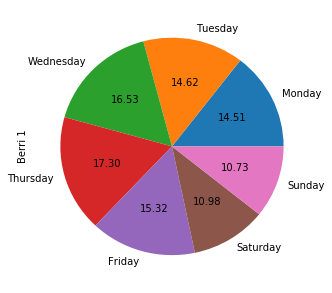

In [17]:
weekday_counts.plot(kind='pie',
                    subplots=True,
                    figsize=(5,5),
                    autopct="%.2f",
                    legend=False )

So it looks like Montrealers are commuter cyclists -- they bike much more during the week. Neat!

# 4.3 Putting it together

Let's put all that together, to prove how easy it is. 6 lines of magical pandas!

If you want to play around, try changing `sum` to `max`, `numpy.median`, or any other function you like.

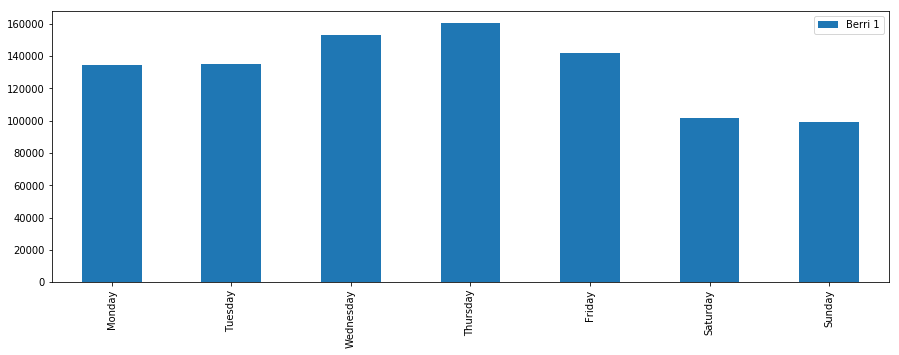

In [26]:
bikes = pd.read_csv('../data/bikes.csv', 
                    sep=';', encoding='latin1', 
                    parse_dates=['Date'], dayfirst=True, 
                    index_col='Date')
# Add the weekday column
berri_bikes = bikes[['Berri 1']].copy()
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday

# Add up the number of cyclists by weekday, and plot!
weekday_counts = berri_bikes.groupby('weekday').sum()
weekday_counts.index = ['Monday', 'Tuesday',
                        'Wednesday', 'Thursday',
                        'Friday', 'Saturday', 'Sunday']
weekday_counts.plot(kind='bar')

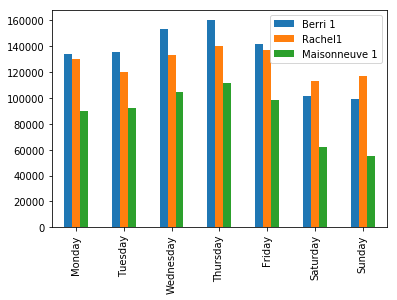

In [33]:
bikes = pd.read_csv('../data/bikes.csv', 
                    sep=';', encoding='latin1', 
                    parse_dates=['Date'], dayfirst=True, 
                    index_col='Date')
comp_bikes = bikes[['Berri 1','Rachel1','Maisonneuve 1']].copy()
comp_bikes.loc[:,'weekday'] = comp_bikes.index.weekday
weekday_counts = comp_bikes.groupby('weekday').sum()
weekday_counts.index = ['Monday', 'Tuesday',
                        'Wednesday', 'Thursday',
                        'Friday', 'Saturday', 'Sunday']
weekday_counts.plot(kind='bar')
plt.show()